In [52]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')



In [53]:
df=pd.read_csv(r"E:\data analysis using python( jupytetr notebooks)\datasets\churm_prediction_train_dataset .csv")
df.head()

,Name,Age,Income,Gender,Education,Product_Purchase,Marital_Status,Region,Churn
0,Grace,56,53093,male,phd,0,0,East,0
1,Nathan,69,96105,male,master,1,1,North,0
2,Leo,46,81885,male,highschool,1,0,East,0
3,Hannah,32,66631,male,bachelor,0,1,West,1
4,Bob,60,102991,female,highschool,0,1,North,0


<h3 style="color: red;">Information about the data</h3>

Age (numerical)

Income (numerical)

Gender (categorical: male, female)

Education (categorical: highschool, bachelor, master, phd)

Product_Purchase (binary: 0 = No, 1 = Yes)

Marital_Status (binary: 0 = Single, 1 = Married)

Region (categorical: North, South, East, West)

Churn (binary target variable: 0 = No, 1 = Yes)

<h2 style="color: red;">Cleaning of the data</h2>

In [54]:
df=df.drop_duplicates()

# ARE THERE ANY MISSING VALUES IN THE DATASET

In [55]:
df.isnull().sum()

Name                0
Age                 0
Income              0
Gender              0
Education           0
Product_Purchase    0
Marital_Status      0
Region              0
Churn               0
dtype: int64

# Explortory data analysis

In [56]:
df.columns

Index(['Name', 'Age', 'Income', 'Gender', 'Education', 'Product_Purchase',
       'Marital_Status', 'Region', 'Churn'],
      dtype='object')

In [57]:
df.shape

(400, 9)

In [58]:
df.dtypes

Name                object
Age                  int64
Income               int64
Gender              object
Education           object
Product_Purchase     int64
Marital_Status       int64
Region              object
Churn                int64
dtype: object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              400 non-null    object
 1   Age               400 non-null    int64 
 2   Income            400 non-null    int64 
 3   Gender            400 non-null    object
 4   Education         400 non-null    object
 5   Product_Purchase  400 non-null    int64 
 6   Marital_Status    400 non-null    int64 
 7   Region            400 non-null    object
 8   Churn             400 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 28.3+ KB


In [60]:
df.describe()

,Age,Income,Product_Purchase,Marital_Status,Churn
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,43.987500,74791.770000,0.460000,0.517500,0.535000
std,14.966373,26403.237424,0.499022,0.500319,0.499398
min,18.000000,30384.000000,0.000000,0.000000,0.000000
25%,32.000000,51686.000000,0.000000,0.000000,0.000000
50%,45.000000,74646.500000,0.000000,1.000000,1.000000
75%,56.000000,96638.500000,1.000000,1.000000,1.000000
max,69.000000,119930.000000,1.000000,1.000000,1.000000


In [61]:

df.nunique()

Name                 26
Age                  52
Income              399
Gender                2
Education             4
Product_Purchase      2
Marital_Status        2
Region                4
Churn                 2
dtype: int64

# what is the average age of the customers

In [62]:
df['Age'].mean()

np.float64(43.9875)

# the average Income of the customers

In [63]:
df['Income'].mean()

np.float64(74791.77)

# Number of males compared to females

In [64]:
df['Gender'].value_counts()

Gender
female    203
male      197
Name: count, dtype: int64

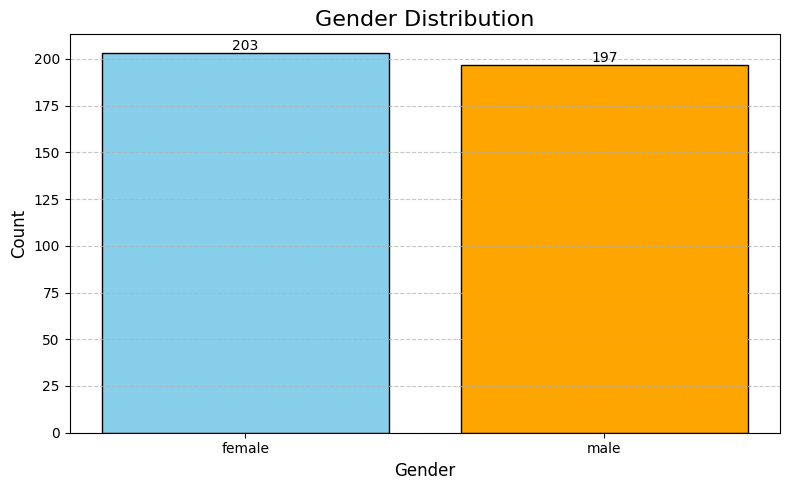

In [65]:

count = df['Gender'].value_counts()

plt.figure(figsize=(8, 5))
bars = plt.bar(count.index, count, color=['skyblue', 'orange'], edgecolor='black')

# Add title and labels
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height,  # y-coordinate
        str(height),  # text (bar value)
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=10,
        color='black'
    )

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Education distribution among the customers

In [66]:
count_2=df['Education'].value_counts()
count_2

Education
master        110
highschool    100
bachelor       99
phd            91
Name: count, dtype: int64

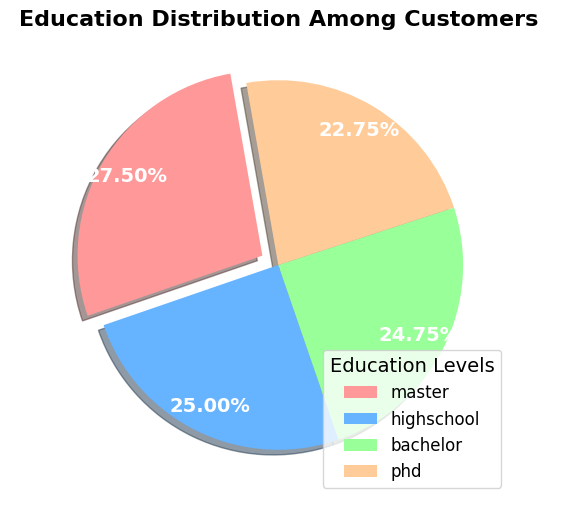

In [67]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Create the pie chart
plt.figure(figsize=(10, 6))  # Adjusted figure size
plt.pie(count_2, 
        labels=count_2.index, 
        startangle=100, 
        autopct='%.2f%%',  # Display percentage with 2 decimals
        pctdistance=0.85,  # Position the percentage labels closer to the center
        colors=colors,  # Set custom colors
        explode=(0.1, 0, 0, 0),  # "explode" first slice to highlight it
        shadow=True,  # Add shadow for depth
        textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'})  # Set text properties

# Add a title
plt.title('Education Distribution Among Customers', fontsize=16, fontweight='bold')

# Display the legend with a custom position
plt.legend(loc='lower right', fontsize=12, title="Education Levels", title_fontsize=14)
plt.show()

# distribution of purchase by the customers

In [68]:
product_purchase=df['Product_Purchase'].value_counts()
product_purchase

Product_Purchase
0    216
1    184
Name: count, dtype: int64

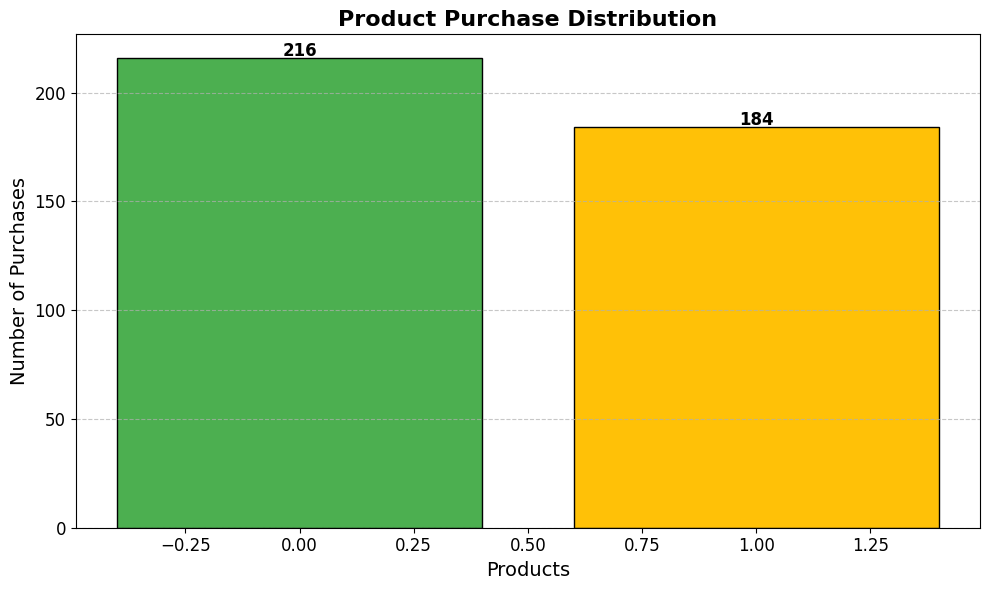

In [69]:
plt.figure(figsize=(10, 6))  # Set a larger figure size
bars = plt.bar(product_purchase.index, product_purchase, color=['#4CAF50', '#FFC107'], edgecolor='black')

# Add titles and labels
plt.title('Product Purchase Distribution', fontsize=16, fontweight='bold')  # Add a title
plt.xlabel('Products', fontsize=14)  # X-axis label
plt.ylabel('Number of Purchases', fontsize=14)  # Y-axis label

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 1,  # Position the text above the bar
             f'{int(height)}', ha='center', fontsize=12, color='black', weight='bold')

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
df.head(2)

,Name,Age,Income,Gender,Education,Product_Purchase,Marital_Status,Region,Churn
0,Grace,56,53093,male,phd,0,0,East,0
1,Nathan,69,96105,male,master,1,1,North,0


# marital status distribution 

In [71]:
marital_status=df['Marital_Status'].value_counts()
marital_status

Marital_Status
1    207
0    193
Name: count, dtype: int64

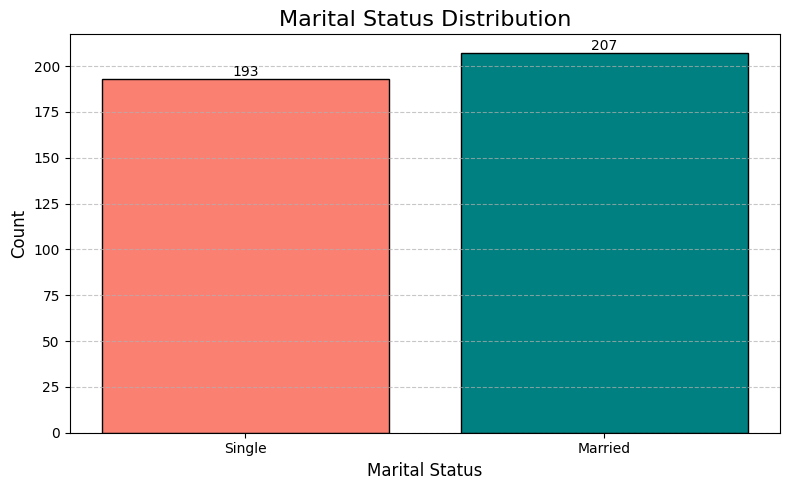

In [72]:
# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(marital_status.index, marital_status, color=['teal', 'salmon'], edgecolor='black')

# Add title and labels
plt.title('Marital Status Distribution', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Single', 'Married'], fontsize=10)  # Assuming 0 = Single, 1 = Married

# Annotate each bar with its count value
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height,  # y-coordinate
        str(height),  # text (bar value)
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=10,
        color='black'
    )

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Region distribution among the customers

In [73]:
region_dist=df['Region'].value_counts()
region_dist

Region
North    108
South    103
West      97
East      92
Name: count, dtype: int64

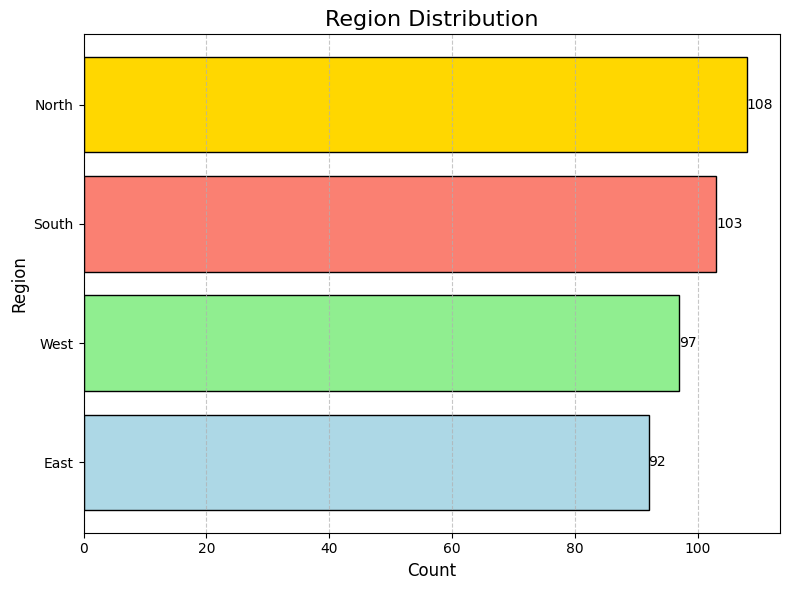

In [74]:
# Sample region distribution data (replace with your actual data)
region_dist = df['Region'].value_counts()

# Sort the data so the highest score is at the top
region_dist = region_dist.sort_values(ascending=True)

# Define a color palette with four different colors
colors = ['lightblue', 'lightgreen', 'salmon', 'gold']

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(region_dist.index, region_dist, color=colors, edgecolor='black')

# Add title and labels
plt.title('Region Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Annotate each bar with its count value
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,  # x-coordinate (bar's width)
        bar.get_y() + bar.get_height() / 2,  # y-coordinate (middle of the bar)
        str(width),  # text (bar value)
        ha='left',  # horizontal alignment
        va='center',  # vertical alignment
        fontsize=10,
        color='black'
    )

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# churn distribution among customers

In [75]:
churn_dist=df['Churn'].value_counts()
churn_dist


Churn
1    214
0    186
Name: count, dtype: int64

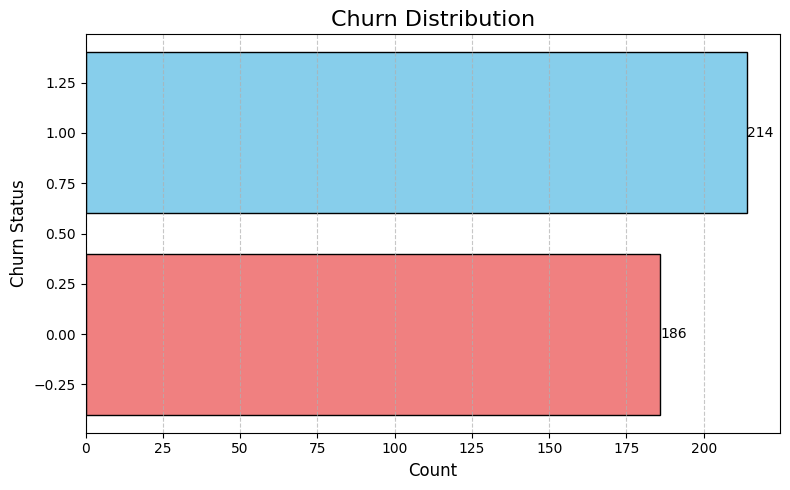

In [76]:
churn_dist = churn_dist.sort_values(ascending=True)

# Define colors for churn categories (e.g., Yes and No)
colors = ['lightcoral', 'skyblue']  # Adjust as needed

# Create the horizontal bar plot
plt.figure(figsize=(8, 5))
bars = plt.barh(churn_dist.index, churn_dist, color=colors, edgecolor='black')

# Add title and labels
plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Churn Status', fontsize=12)

# Annotate each bar with its count value
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,  # x-coordinate (bar's width)
        bar.get_y() + bar.get_height() / 2,  # y-coordinate (middle of the bar)
        str(width),  # text (bar value)
        ha='left',  # horizontal alignment
        va='center',  # vertical alignment
        fontsize=10,
        color='black'
    )

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
df.head(2)

,Name,Age,Income,Gender,Education,Product_Purchase,Marital_Status,Region,Churn
0,Grace,56,53093,male,phd,0,0,East,0
1,Nathan,69,96105,male,master,1,1,North,0


In [78]:
df.groupby('Gender')['Product_Purchase'].value_counts()

Gender  Product_Purchase
female  0                   112
        1                    91
male    0                   104
        1                    93
Name: count, dtype: int64

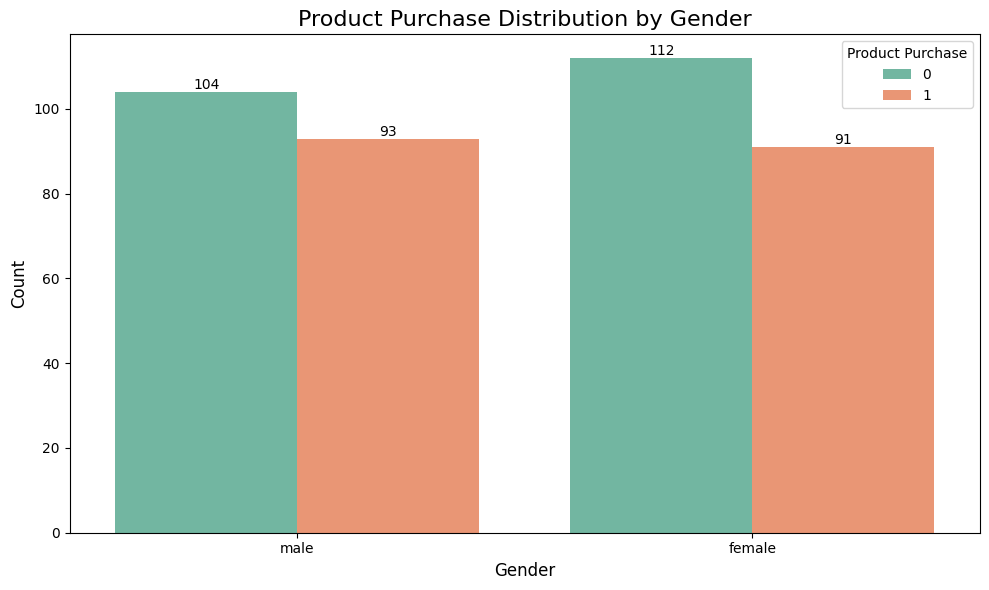

In [79]:
# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender', hue='Product_Purchase', palette='Set2')

# Annotate the bars with their respective counts
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', fontsize=10, color='black')

# Add title and labels
plt.title('Product Purchase Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Improve the legend
plt.legend(title='Product Purchase', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [80]:
df.groupby('Gender')['Churn'].value_counts()

Gender  Churn
female  1        111
        0         92
male    1        103
        0         94
Name: count, dtype: int64

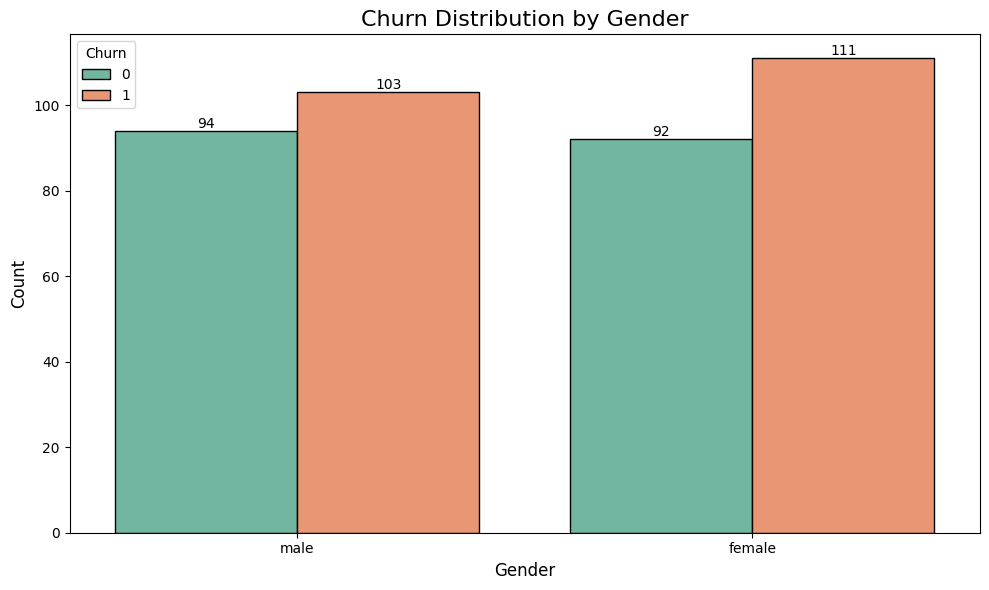

In [81]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender', hue='Churn', palette='Set2', edgecolor='black')

# Add annotations on top of each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')

# Add title and labels
plt.title('Churn Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(title='Churn', fontsize=10)

# Improve layout
plt.tight_layout()

In [82]:
gender_edu=df.groupby('Gender')['Education'].value_counts()
gender_edu

Gender  Education 
female  bachelor      56
        phd           51
        highschool    49
        master        47
male    master        63
        highschool    51
        bachelor      43
        phd           40
Name: count, dtype: int64

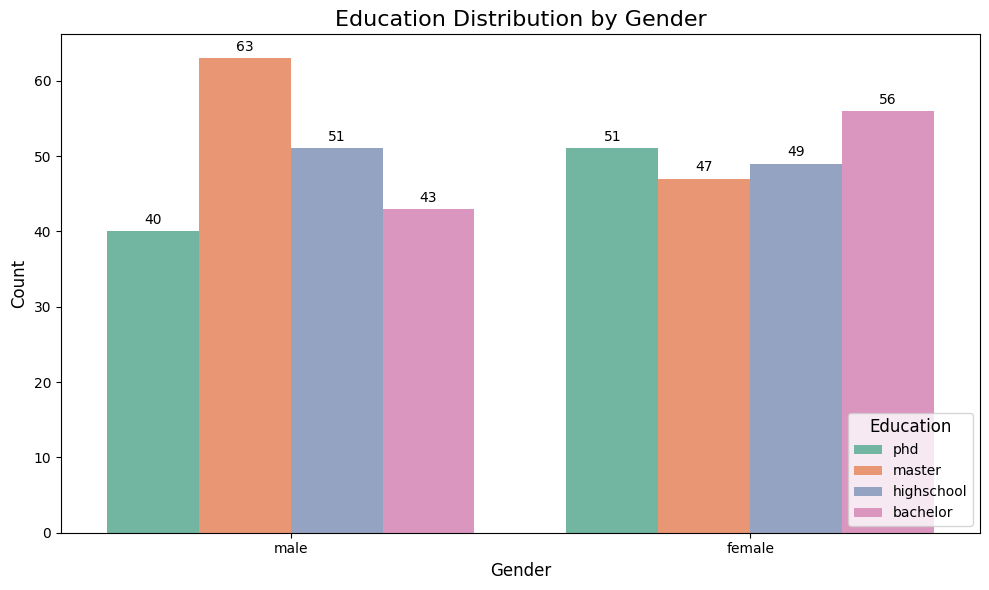

In [83]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender', hue='Education', palette='Set2')

# Add annotations on top of the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add title and labels
plt.title('Education Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Improve legend appearance
plt.legend(title='Education', fontsize=10, title_fontsize=12, loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


# CREATION OF A MODEL THAT WILL PREDICT CHURN

In [84]:
df.head()

,Name,Age,Income,Gender,Education,Product_Purchase,Marital_Status,Region,Churn
0,Grace,56,53093,male,phd,0,0,East,0
1,Nathan,69,96105,male,master,1,1,North,0
2,Leo,46,81885,male,highschool,1,0,East,0
3,Hannah,32,66631,male,bachelor,0,1,West,1
4,Bob,60,102991,female,highschool,0,1,North,0


## loading of the necesary libraries

In [85]:

from sklearn import linear_model
from sklearn import preprocessing

## converting object variables to numeric variables

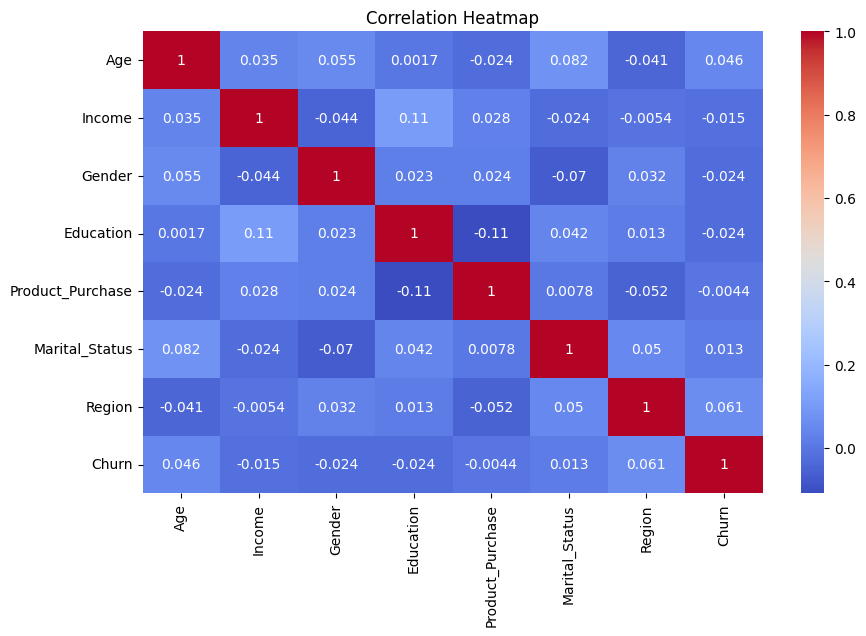

In [86]:
#initializing label encoder
label_encoder=preprocessing.LabelEncoder()

df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Region']=label_encoder.fit_transform(df['Region'])
df['Education']=label_encoder.fit_transform(df['Education'])

numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [87]:
df.head()

,Name,Age,Income,Gender,Education,Product_Purchase,Marital_Status,Region,Churn
0,Grace,56,53093,1,3,0,0,0,0
1,Nathan,69,96105,1,2,1,1,1,0
2,Leo,46,81885,1,1,1,0,0,0
3,Hannah,32,66631,1,0,0,1,3,1
4,Bob,60,102991,0,1,0,1,1,0


## dividing the dataset into dependent and independent variable

In [88]:

x=df.drop(['Name','Churn'], axis=1)
y=df['Churn']



### normalizing the dataset

In [89]:
from sklearn.preprocessing import StandardScaler

#create a scaler
scaler=StandardScaler()
#fitting the scaler to the data and transforming it
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.80363784, -0.82285153,  1.01511421, ..., -0.92295821,
        -1.03563452, -1.38369326],
       [ 1.67333957,  0.80823125,  1.01511421, ...,  1.08347268,
         0.96559161, -0.46885474],
       [ 0.13463652,  0.26898645,  1.01511421, ...,  1.08347268,
        -1.03563452, -1.38369326],
       ...,
       [-0.13296401, -1.18830175,  1.01511421, ...,  1.08347268,
        -1.03563452,  0.44598378],
       [ 1.00433824,  0.4400886 , -0.98511083, ...,  1.08347268,
         0.96559161, -1.38369326],
       [ 0.26843678, -0.22854461, -0.98511083, ..., -0.92295821,
        -1.03563452, -0.46885474]])

## split the dataset into train and test dataset

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [91]:
if len(x_train.shape) == 1:
    x_train = x_train.reshape(-1, 1)

## train the model

# Logistic Regression Model

In [92]:
from sklearn.linear_model import LogisticRegression
# initializing the model
lr=LogisticRegression()
# fitting the model
lr.fit(x_train, y_train)
# predict the dependent varible in the test dataset
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Evaluation of the model

In [93]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
print(f'accuracy_score: {accuracy:.2f}')


accuracy_score: 0.53


In [114]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.45      0.09      0.15        56
           1       0.53      0.91      0.67        64

    accuracy                           0.53       120
   macro avg       0.49      0.50      0.41       120
weighted avg       0.50      0.53      0.43       120



# Decision Tree Model

In [105]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [153]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(max_depth=7)
#fit the model
d_tree.fit(x1_train,y1_train)
predictions=d_tree.predict(X=x1_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [154]:
accuracy_score(y1_test, predictions)

0.5166666666666667

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, predictions)

array([[36, 20],
       [38, 26]])

In [ ]:
class_report=classification_report(1_test, predictions)y
print(class_report)

              precision    recall  f1-score   support

           0       0.49      0.64      0.55        56
           1       0.57      0.41      0.47        64

    accuracy                           0.52       120
   macro avg       0.53      0.52      0.51       120
weighted avg       0.53      0.52      0.51       120



# Random forest


In [157]:
from sklearn.ensemble import RandomForestClassifier
#train the model
rf_model=RandomForestClassifier(n_estimators=1000, #number of trees
                                max_features=2,    #num of features considered
                                oob_score=True)#use oob scoring
#fit the model
rf_model.fit(x1_train,y1_train)
#make predictions
predictions_rf=rf_model.predict(x1_test)
predictions_rf



array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [158]:
accuracy_score(y1_test,predictions_rf)

0.4583333333333333

In [159]:
print(rf_model.oob_score_)

0.48928571428571427


In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, predictions_rf)

array([[19, 37],
       [28, 36]])

In [165]:
c_report=classification_report(y1_test,predictions_rf)
print(c_report)

              precision    recall  f1-score   support

           0       0.40      0.34      0.37        56
           1       0.49      0.56      0.53        64

    accuracy                           0.46       120
   macro avg       0.45      0.45      0.45       120
weighted avg       0.45      0.46      0.45       120

